In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np   # ndarray + mathmathical functions
import pandas as pd  # data analysis
import matplotlib.pyplot as plt # MATLAB-like interface to plot graphs
import os   # os management

# KERAS
"""
 high-level neural network s API that runs on
top of other deep learning frameworks like TensorFlow or Theano.
Keras provides a convenient and user-friendly interface for building,
 training, and evaluating neural network models. """
import keras

# ImageDataGenerator is a class provided by Keras that is used for data augmentation(artificially increasing dataset)
# when training deep learning models, especially convolutional neural networks (CNNs) for image classification tasks.

# img_to_array -> image to numpy array -> format that can be fed into a neural network model.

# load_img -> loading file form given path
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# count no. of subdirectories, here it is class
len(os.listdir("/content/drive/MyDrive/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
# Augmenting training dataset to enrich the variety of examples seen by the model
train_datagen = ImageDataGenerator(
    zoom_range=0.5,        # Randomly zooming into images (adds variety)
    shear_range=0.3,       # Applying shear transformations (tilting)
    horizontal_flip=True,  # Flipping images horizontally (increases diversity)
    preprocessing_function=preprocess_input  # Applying preprocessing function suitable for the model
)

# No augmentation for the validation dataset, but still applying necessary preprocessing
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Applying the same preprocessing for validation
)


In [ ]:
!unzip '/content/drive/My Drive/Plant_Disease/archive.zip' -d '/content/drive/My Drive/Plant_Disease/'


Archive:  /content/drive/My Drive/Plant_Disease/archive.zip
replace /content/drive/My Drive/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dataset_path = '/content/drive/MyDrive/Plant_Disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

train = train_datagen.flow_from_directory(directory= dataset_path+'/train',
                                          target_size= (256, 256),
                                          batch_size= 32)

# The 'target_size' parameter is set to (256, 256), which means that the input images will be resized to a shape of (256, 256) before being fed into the model.
# It represents the number of samples that will be fed into the model at once. In your case, each batch during training or validation will contain 32 images.

val = val_datagen.flow_from_directory(directory= dataset_path+'/valid',
                                      target_size= (256, 256),
                                      batch_size= 32)

Found 70295 images belonging to 38 classes.
Found 17099 images belonging to 38 classes.


In [ ]:
# curious
t_img, label = train.next();


In [ ]:
def plotImage(img_arr, label):

  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

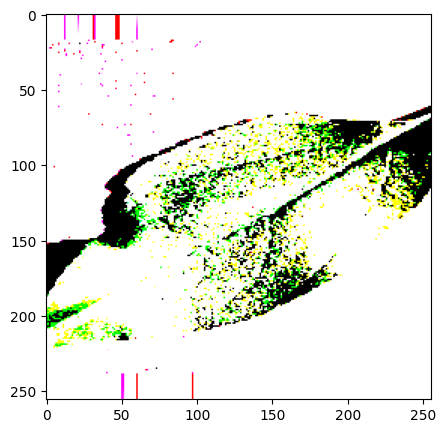

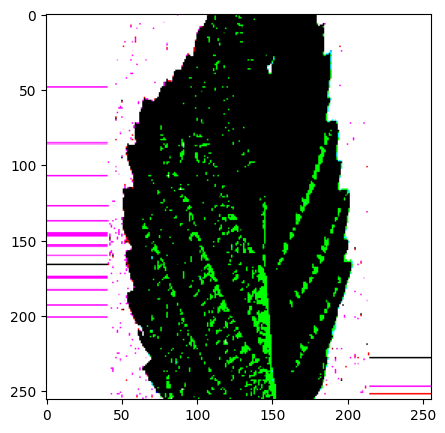

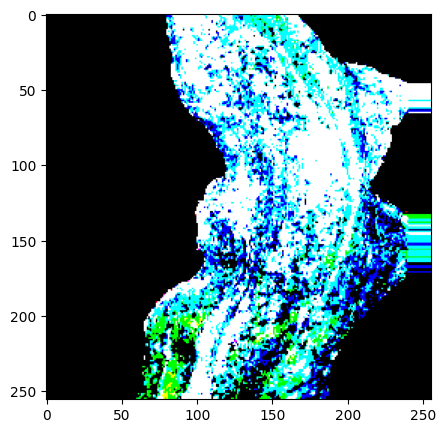

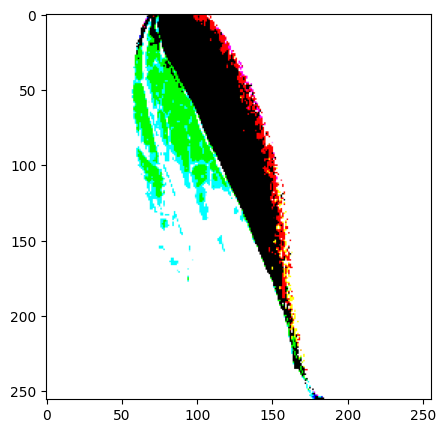

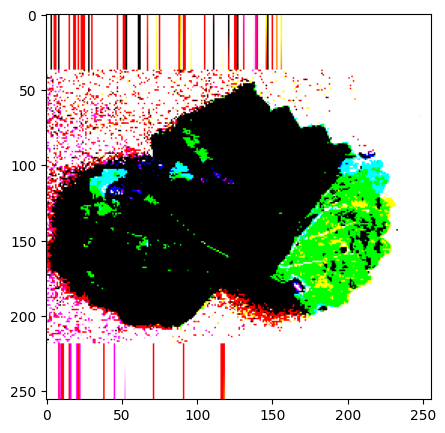

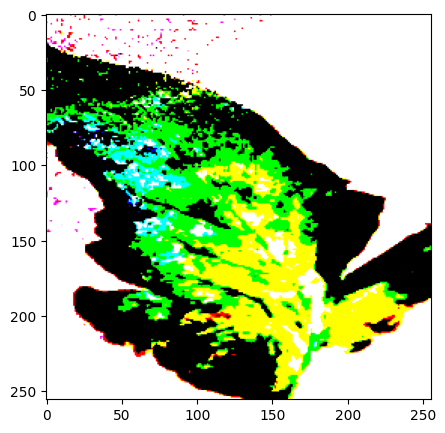

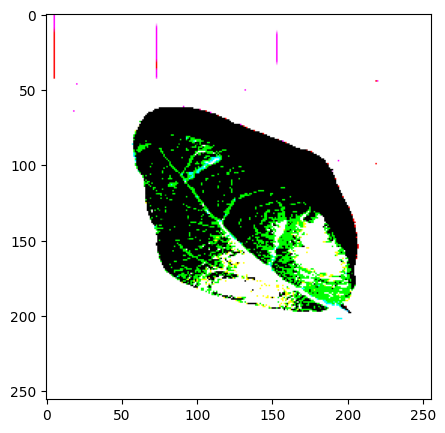

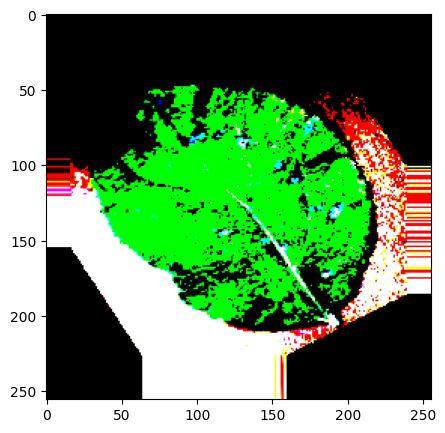

In [ ]:
plotImage(t_img[:8], label[:8])

Building Our Model



In [ ]:
# Import necessary Keras modules and components
from keras.layers import Dense, Flatten  # Import layers for building the neural network
from keras.models import Model  # Import the Model class for creating a custom model
from keras.applications.vgg19 import VGG19  # Import the VGG19 pre-trained model from Keras Applications


In [ ]:
base_model = VGG19(input_shape=(256, 256, 3), include_top=False)

# Create a custom neural network model based on the VGG19 architecture
# VGG19 is a popular pre-trained convolutional neural network for image classification tasks.

# input images with a shape of (256, 256, 3), indicating a height and width of 256 pixels and three color channels (red, green, blue).

# The 'include_top=False' argument means we're using VGG19 without its final classification layers.


80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable= False
    # In simple terms, the code is telling the computer to "lock" the knowledge already present in the VGG19 model.
    # It's like saying, "Don't change what VGG19 already knows."


  # Iterate through the layers in the base_model
    # Set the 'trainable' attribute of each layer to 'False'
    # This means that the weights of these layers will not be updated during training.
    # It's common to freeze the weights of pre-trained layers when fine-tuning a model
    # to retain the knowledge learned from the original task (e.g., image classification).
    # This is particularly useful when using transfer learning.



In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# Flatten the output of the base_model to transform it into a 1D array.
# The Flatten layer in a neural network does something similar.
# It takes the structured information (features) from the previous layers, organizes it, and converts it into a format that's easy for the next layers to work with.
X = Flatten()(base_model.output)

# Dense is a type of layer in a neural network. It's fully connected, meaning each neuron in this layer is connected to every neuron in the previous layer.
# 38 : This specifies that the Dense layer will have 38 neurons.
# In the context of classification, above units often corresponds to the number of classes or categories the model is trying to predict.
# The softmax function takes a set of numbers (scores or preferences) and converts them into
# a probability distribution, making sure the sum of probabilities is 1.
X = Dense(units=38, activation='softmax')(X)

# Create the final model by specifying the input as the base_model's input
# and the output as the result of the above layers (X).
model = Model(base_model.input, X)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])
# Adam stands for Adaptive Moment Estimation, gradient-based optimization : that adjusts how the model learns from its mistakes during training.
# specific method called 'categorical crossentropy' to measure these mistakes.
# 'Accuracy' is a measure of how well the model is doing overall.


Early Stopping and Model Check Point

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stopping Callback:
# - 'EarlyStopping' is a callback that monitors a specific metric during training ('val_accuracy' in this case).
# - 'min_delta=0.01' sets the minimum change in the monitored metric to be considered an improvement.
# - 'patience=10' specifies the number of epochs with no improvement after which training will stop.
# - 'verbose=1' means that messages will be printed during each training when early stopping is triggered.
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 10, verbose= 1)

# Model Checkpoint Callback:
# - 'ModelCheckpoint' is a callback that saves the model's weights when a monitored metric improves.
# - 'filepath="best_model.h5"' defines the file to save the best model's weights.
# - 'monitor='val_accuracy'' specifies the metric to monitor for model improvement.
# - 'min_delta=0.01' sets the minimum change in the monitored metric to be considered an improvement.
# - 'patience=10' specifies the number of epochs with no improvement before saving the model.
# - 'verbose=1' means that messages will be printed when a new best model is saved.
# - 'save_best_only=True' ensures that only the best model (based on the monitored metric) is saved.
mc = ModelCheckpoint(filepath="best_model.h5",
                     monitor= 'val_accuracy',
                     min_delta= 0.01,
                     patience= 10,
                     verbose= 1,
                     save_bestr_only= True)


# Combine the defined callbacks into a list.
cb = [es, mc]



In [ ]:
1
his = model.fit_generator(train,
                          steps_per_epoch=16,
                          epochs=20,
                          verbose=1,
                          callbacks=cb,
                          validation_data=val,
                          validation_steps=16)


<ipython-input-17-585a0c421313>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 26.5192 - accuracy: 0.2090
Epoch 1: saving model to best_model.h5
16/16 [==============================] - 291s 18s/step - loss: 26.5192 - accuracy: 0.2090 - val_loss: 16.1004 - val_accuracy: 0.3711


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 16.8082 - accuracy: 0.4141
Epoch 2: saving model to best_model.h5
16/16 [==============================] - 273s 18s/step - loss: 16.8082 - accuracy: 0.4141 - val_loss: 11.2886 - val_accuracy: 0.5078
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 14.7650 - accuracy: 0.4707
Epoch 3: saving model to best_model.h5
16/16 [==============================] - 273s 18s/step - loss: 14.7650 - accuracy: 0.4707 - val_loss: 9.3835 - val_accuracy: 0.6016
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 10.0639 - accuracy: 0.5820
Epoch 4: saving model to best_model.h5
16/16 [==============================] - 271s 18s/step - loss: 10.0639 - accuracy: 0.5820 - val_loss: 10.3765 - val_accuracy: 0.6348
Epoch 5/20
16/16 [==============================] - ETA: 0s - loss: 10.6102 - accuracy: 0.5977
Epoch 5: saving model to best_model.h5
16/16 [==============================] - 257s 16s/step - loss: 10.

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

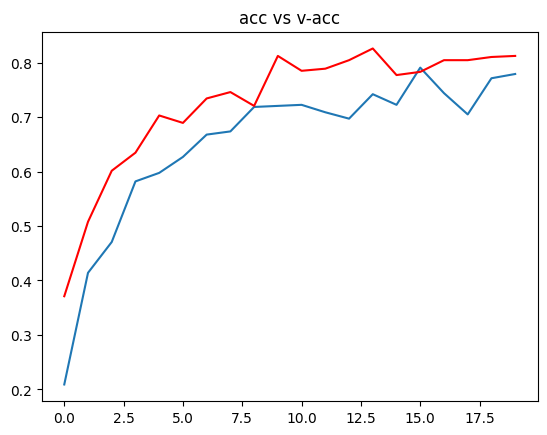

In [ ]:
# Plotting the training accuracy (h['accuracy']) and validation accuracy (h['val_accuracy'])

# plt.plot(h['accuracy']): Plots the training accuracy values over the epochs.
# plt.plot(h['val_accuracy'], c="red"): Plots the validation accuracy values over the epochs in red.

# plt.title("acc vs v-acc"): Sets the title of the plot as "acc vs v-acc" for clarity.
# plt.show(): Displays the plot.

import matplotlib.pyplot as plt

plt.plot(h['accuracy'])  # Plotting training accuracy
plt.plot(h['val_accuracy'], c="red")  # Plotting validation accuracy in red
plt.title("acc vs v-acc")  # Setting the title of the plot
plt.show()  # Displaying the plot


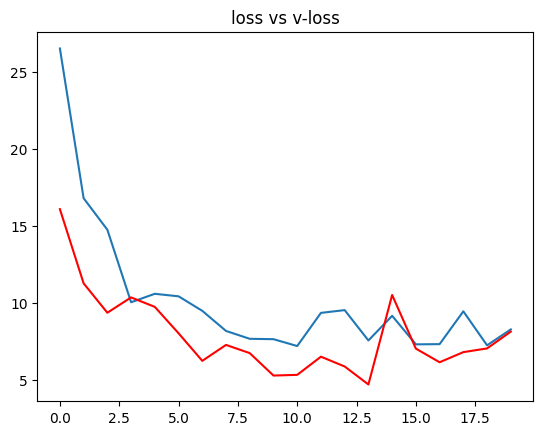

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# load best model

from keras.models import load_model

model = load_model('/content/best_model.h5')


In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"The Accuracy of your model is = {acc*100}%")

<ipython-input-22-b50687481a2e>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The Accuracy of your model is = 81.55447840690613%


In [ ]:
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
# making dictionary
ref = dict(zip (list(train.class_indices.values()), list(train.class_indices.keys()) ) )

In [ ]:
def predictionX(path):
    # Load the image from the given path and resize it to (256, 256)
    img = load_img(path, target_size=(256, 256))

    # Convert the image to a NumPy array
    i = img_to_array(img)

    # Preprocess the input array to make it suitable for the model
    im = preprocess_input(i)

    # Add an extra dimension to the image array to make it compatible with the model
    img = np.expand_dims(im, axis=0)

    # Use the model to make a prediction on the image
    pred = np.argmax(model.predict(img))

    # Print the predicted class using the reference dictionary 'ref'
    print(f"The image belongs to {ref[pred]}")

In [ ]:
path = '/content/drive/MyDrive/Plant_Disease/test/AppleScab2.JPG'
predictionX(path)

1/1 [==============================] - 0s 19ms/step
The image belongs to Apple___Apple_scab


In [ ]:
import io
import base64
from io import BytesIO
from PIL import Image



In [ ]:
def image_to_base64(image_path):
    # Open and read the image file as binary data
    with open(image_path, 'rb') as image_file:
        # Encode the binary data to Base64
        base64_image = base64.b64encode(image_file.read()).decode('utf-8')

    return base64_image

In [ ]:
def prediction(path):
  # Your Base64 encoded image string
  base64_image_string = image_to_base64(path)

  # Decode the Base64 string to binary data
  binary_image = base64.b64decode(base64_image_string)

  # Open the image using Pillow (PIL)
  pil_image = Image.open(io.BytesIO(binary_image))
  target_size= (256, 256)
  pil_image.resize((256, 256));

  # Convert the PIL image to a NumPy array
  image_array = img_to_array(pil_image)

  im = preprocess_input(image_array)

  #adding 1 dimension to work with model
  img = np.expand_dims(im, axis= 0)
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to {ref[pred]}")





In [ ]:
path = '/content/drive/MyDrive/Plant_Disease/test/test/PotatoEarlyBlight1.JPG'
prediction(path)

1/1 [==============================] - 0s 20ms/step
The image belongs to Potato___Early_blight


In [ ]:
def base64_to_image(base64):
  # Decode the Base64 string to binary data
  binary_image = base64.b64decode(base64)

  # Create an in-memory file-like object
  image_buffer = BytesIO(binary_image)

  # Open the image using a library like PIL (Pillow)
  image = Image.open(image_buffer)

  # Now, you can work with the image in memory, such as displaying it or processing it further
  return image;


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Plant-Disease-Detection.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Plant-Disease-Detection.ipynb to html
[NbConvertApp] Writing 1446753 bytes to /content/drive/MyDrive/Colab Notebooks/Plant-Disease-Detection.html
